In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import seaborn as sns
import pandas as pd

2.12.0


## Loading the dataset

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Analyzing the data

In [3]:
print(x_train[1,:,:])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [4]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [5]:
print(f"Total number of classes : {np.unique(y_train).size}")

Total number of classes : 10


In [59]:
labels_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

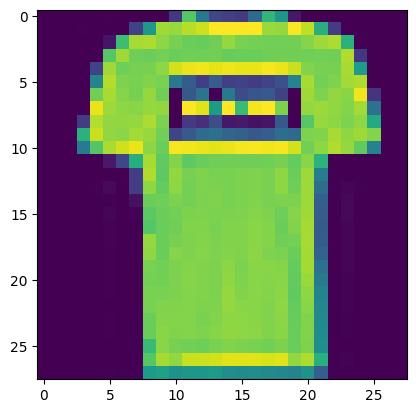


 label: T-shirt/top


In [61]:
import matplotlib.pyplot as plt

img=x_train[1,:,:]
plt.imshow(img)
plt.show()
print()
print(f" label: {labels_names[y_train[1]]}")

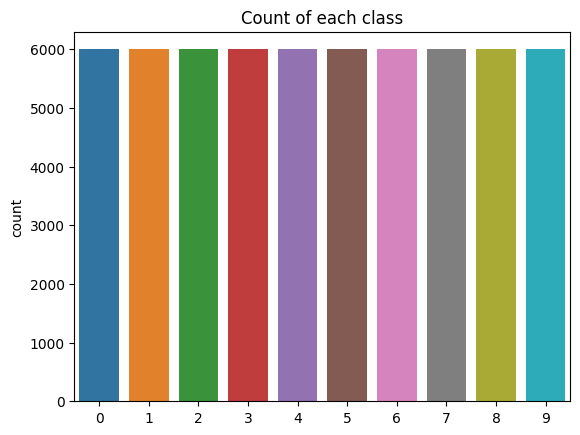

In [63]:
sns.countplot(x=y_train).set(title='Count of each class');

## Model building

In [8]:
# Rescale the image values so that they lie in between 0 and 1.

x_train=x_train/255
x_test=x_test/255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [30]:
model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(10,activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [32]:
opt=tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','mae'])

## Training the data

In [33]:
history=model.fit(x_train,y_train,epochs=20,batch_size=256,verbose=False)

In [34]:
df_history=pd.DataFrame(history.history)

In [35]:
df_history.head()

,loss,accuracy,mae
0,0.579554,0.793183,4.420000
1,0.379064,0.866667,4.420000
2,0.345611,0.878117,4.420000
3,0.320425,0.885833,4.420001
4,0.306631,0.890767,4.420000


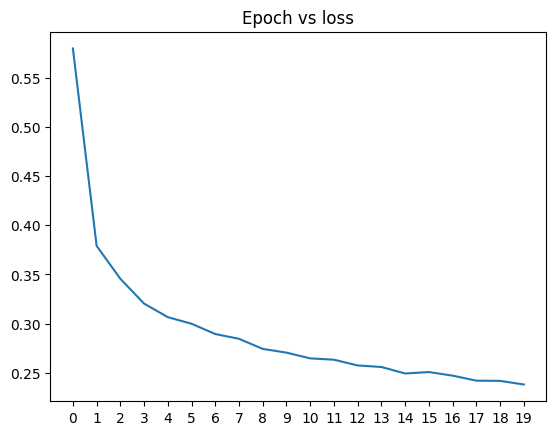

In [38]:
df_history.plot(y='loss',title='Epoch vs loss',legend=False)
plt.xticks(range(len(df_history)), df_history.index);

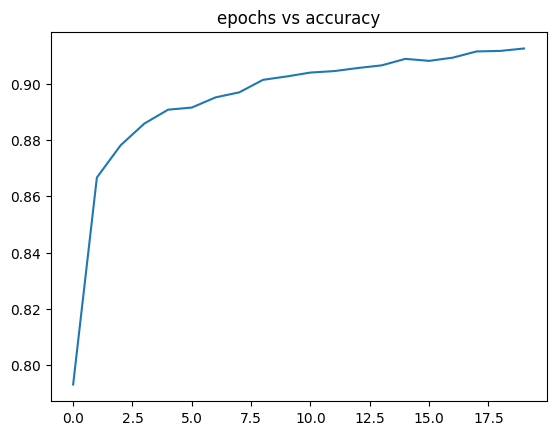

In [41]:
df_history.plot(y='accuracy',title='epochs vs accuracy',legend=False);

## Evaluate the model

In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3102 - accuracy: 0.8908 - mae: 4.4200


[0.3101690113544464, 0.8907999992370605, 4.419997215270996]

## Model prediction

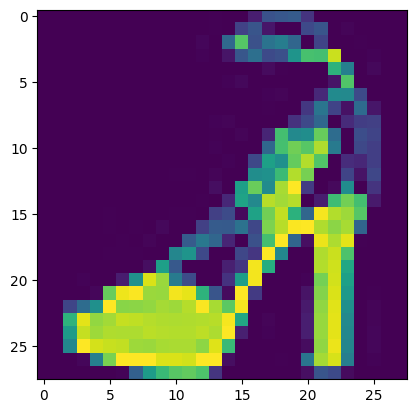


label: Sandal


In [64]:
random_img_no=np.random.choice(x_test.shape[0])

image_test=x_test[random_img_no,:,:]
plt.imshow(image_test)
plt.show()
print()
print(f"label: {labels_names[y_test[random_img_no]]}")

In [67]:
prediction=model.predict(image_test[np.newaxis,...,np.newaxis],verbose=False)
print(f"Model prediction is '{labels_names[np.argmax(prediction)]}'.")

Model prediction is 'Sandal'.
